In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/new-datasettoxinsp/peptide.csv
/kaggle/input/new-datasettoxinsp/protein_test1002.csv
/kaggle/input/new-datasettoxinsp/protein_train1002.csv


## Protein train


In [2]:
import pandas as pd

# Load the dataset
file_path = '/kaggle/input/new-datasettoxinsp/protein_train1002.csv'
data = pd.read_csv(file_path)

# Remove the unnamed index column
data = data.drop(columns=['Unnamed: 0'])

# Calculate sequence lengths
data['sequence_length'] = data['sequence'].apply(len)

# Calculate statistics for sequence lengths
length_stats = data['sequence_length'].describe()

# Label distribution
label_distribution = data['label'].value_counts()

# Output the calculated statistics
print("Statistics for Sequence Lengths:")
print(length_stats)
print("\nLabel Distribution:")
print(label_distribution)
data

Statistics for Sequence Lengths:
count    10084.000000
mean       243.696450
std        250.070674
min          3.000000
25%         68.000000
50%        138.000000
75%        358.000000
max       1002.000000
Name: sequence_length, dtype: float64

Label Distribution:
label
0    5671
1    4413
Name: count, dtype: int64


,name,sequence,label,sequence_length
0,>HPCL1_XENTR,MGKQNSKLRPEVLQDLRENTEFTDHELQEWYKGFLKDCPTGHLTVE...,0,193
1,>SIX4_HOTTS,DGYIKGNKGCKVSCVINNVFCNSMCKSSGGSYGYCWSWGLACWCEG...,1,62
2,>TAG2L_AGEOR,MRAIISLLLISAMVFSIIEAVPEEEGLQLSEDERGGCLPHNRFCNA...,1,70
3,>P2011_DANRE,MKTKFTKKTVLKFFGILFAILLLSVLILFSVVIGRTFTFKVNRELG...,0,515
4,>COC2C_CONCL,DVCDSLVGGRCIHNGCYCERDAPNGNCCNTDGCTARWWCPGTKWD,1,45
...,...,...,...,...
10079,>ECHD1_XENTR,MGIFVCRNSLRMLNVRWLYHRCLSLYNSNHGFNEAKIKEKLAQFTG...,0,299
10080,>TLL1_DANRE,MDYLYSALTSKMNWIALLLAGLTFCCKVSVHSCLDYDDSYDYYEEE...,0,1002
10081,>VM2IA_BOTIN,MIQVLLVTICLAAFPYQGSSIILESGNVNDYEVVYARKVTELPKGA...,1,476
10082,>FRIZ2_DROME,MRHNRLKVLILGLVLLLTSCRADGPLHSADHGMGGMGMGGHGLDAS...,0,694


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


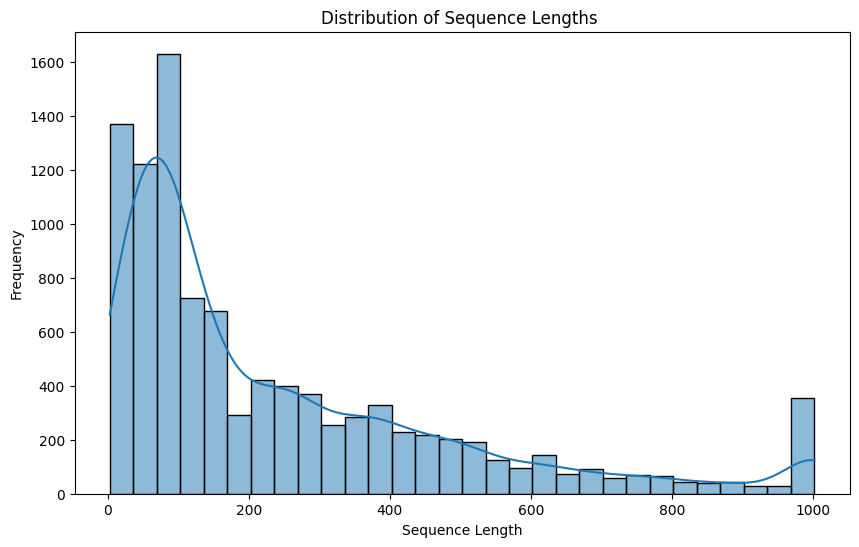

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(data['sequence_length'], bins=30, kde=True)
plt.title('Distribution of Sequence Lengths ')
plt.xlabel('Sequence Length')
plt.ylabel('Frequency')
plt.show()


In [4]:
total_sequences = len(data)
# Print the total number of sequences
print(f"Total number of sequences : {total_sequences}")


Total number of sequences : 10084


In [5]:
import matplotlib.pyplot as plt

# Calculate label distribution
label_distribution = data['label'].value_counts()
print(label_distribution)
# Calculate the percentages of each label
label_percentages = (label_distribution / label_distribution.sum()) * 100
print(label_percentages)


label
0    5671
1    4413
Name: count, dtype: int64
label
0    56.237604
1    43.762396
Name: count, dtype: float64


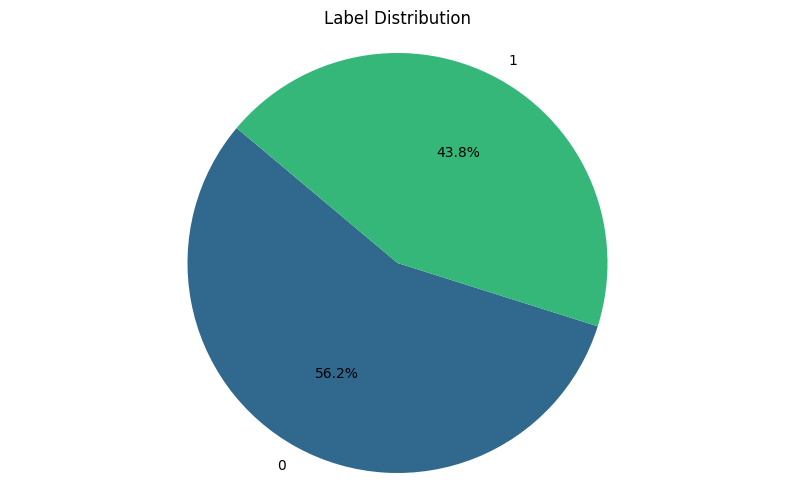

In [6]:
# Plot the label distribution as a pie chart
plt.figure(figsize=(10, 6))
plt.pie(label_percentages, labels=label_percentages.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("viridis", len(label_percentages)))
plt.title('Label Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

# Extracted Peptides from protein_train

In [7]:
# Find sequences with length <= 50
sequences_leq_50 = data[data['sequence_length'] <= 50]
print(f"Number of Peptide sequences with length <= 50: {len(sequences_leq_50)}")
sequences_leq_50

Number of Peptide sequences with length <= 50: 1755


,name,sequence,label,sequence_length
4,>COC2C_CONCL,DVCDSLVGGRCIHNGCYCERDAPNGNCCNTDGCTARWWCPGTKWD,1,45
13,>NA15_ANTXA,GVSCLCDSDGPSVSGNTLSGIIWLAGCPSGWHNCKAHGPNIGWCCKK,1,47
20,>PPK6_SHELA,SESEVPGMWFGPRL,0,14
22,>SK1_BLAGE,EQFDDYGHMRF,0,11
28,>COMB_CONMA,AATCTHWALIYFKTVQLFGWHFNYQVDATYCPQFQPCMP,1,39
...,...,...,...,...
10049,>PPK5_THEPT,SASGSGESSGMWFGPRL,0,17
10050,>3SOBB_DENAN,MICYSHKTPQPSATIGCEEKTCYKKSVRKL,1,30
10060,>SC39_TITOB,DDDDLEGFSE,1,10
10061,>VM3DM_DABSI,VATSEPNRYFNPYSYVELIITVDHS,1,25


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


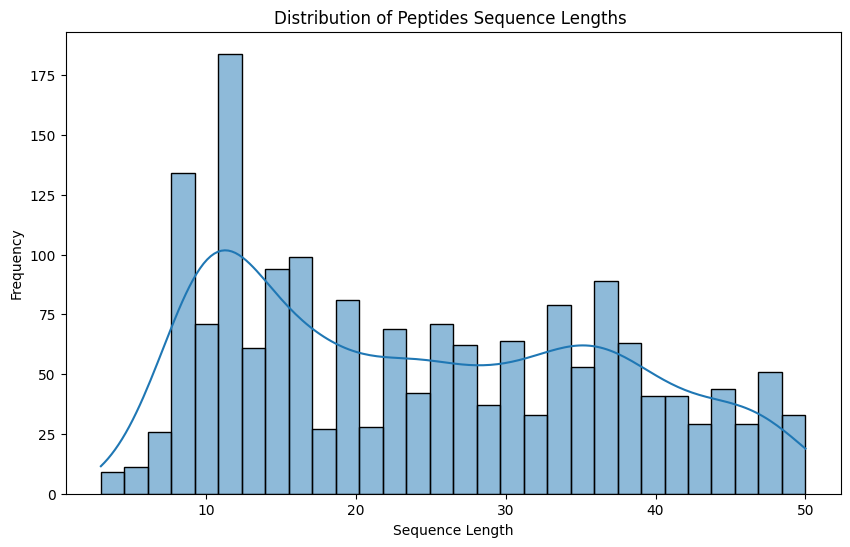

label
1    1099
0     656
Name: count, dtype: int64
label
1    62.621083
0    37.378917
Name: count, dtype: float64


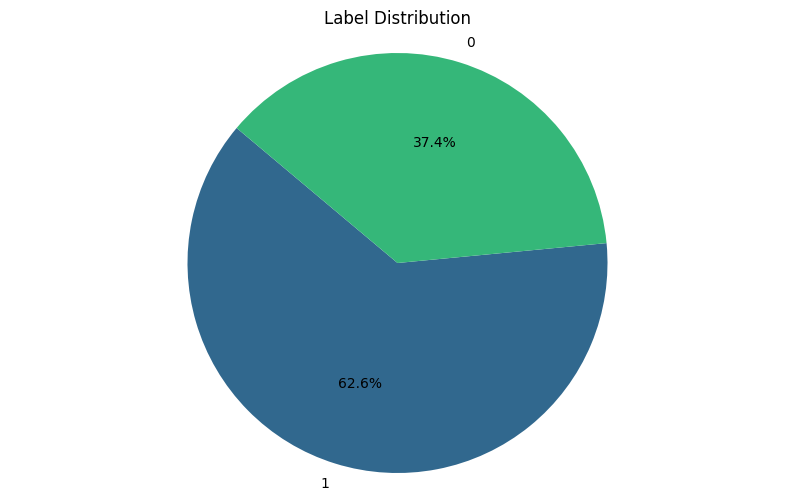

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(sequences_leq_50['sequence_length'], bins=30, kde=True)
plt.title('Distribution of Peptides Sequence Lengths ')
plt.xlabel('Sequence Length')
plt.ylabel('Frequency')
plt.show()



# Calculate label distribution
label_distribution = sequences_leq_50['label'].value_counts()
print(label_distribution)
# Calculate the percentages of each label
label_percentages = (label_distribution / label_distribution.sum()) * 100
print(label_percentages)



# Plot the label distribution as a pie chart
plt.figure(figsize=(10, 6))
plt.pie(label_percentages, labels=label_percentages.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("viridis", len(label_percentages)))
plt.title('Label Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [9]:
# Save the filtered data to a CSV file
sequences_leq_50.to_csv('Peptide1.csv', index=False)
print("Filtered data saved to 'Peptide1.csv'")

Filtered data saved to 'Peptide1.csv'


# Extracted only Proteins from Protein Train

In [10]:
# Find sequences with length > 50
sequences_leq_Protin = data[data['sequence_length'] > 50]
print(f"Number of Protien sequences with length > 50: {len(sequences_leq_Protin)}")
sequences_leq_Protin

Number of Protien sequences with length > 50: 8329


,name,sequence,label,sequence_length
0,>HPCL1_XENTR,MGKQNSKLRPEVLQDLRENTEFTDHELQEWYKGFLKDCPTGHLTVE...,0,193
1,>SIX4_HOTTS,DGYIKGNKGCKVSCVINNVFCNSMCKSSGGSYGYCWSWGLACWCEG...,1,62
2,>TAG2L_AGEOR,MRAIISLLLISAMVFSIIEAVPEEEGLQLSEDERGGCLPHNRFCNA...,1,70
3,>P2011_DANRE,MKTKFTKKTVLKFFGILFAILLLSVLILFSVVIGRTFTFKVNRELG...,0,515
5,>O165_CONTE,MKLTCMVIVAVLFLTAWTFVTAITSNGLENLFPNAHHEMKNPEASK...,1,76
...,...,...,...,...
10079,>ECHD1_XENTR,MGIFVCRNSLRMLNVRWLYHRCLSLYNSNHGFNEAKIKEKLAQFTG...,0,299
10080,>TLL1_DANRE,MDYLYSALTSKMNWIALLLAGLTFCCKVSVHSCLDYDDSYDYYEEE...,0,1002
10081,>VM2IA_BOTIN,MIQVLLVTICLAAFPYQGSSIILESGNVNDYEVVYARKVTELPKGA...,1,476
10082,>FRIZ2_DROME,MRHNRLKVLILGLVLLLTSCRADGPLHSADHGMGGMGMGGHGLDAS...,0,694


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


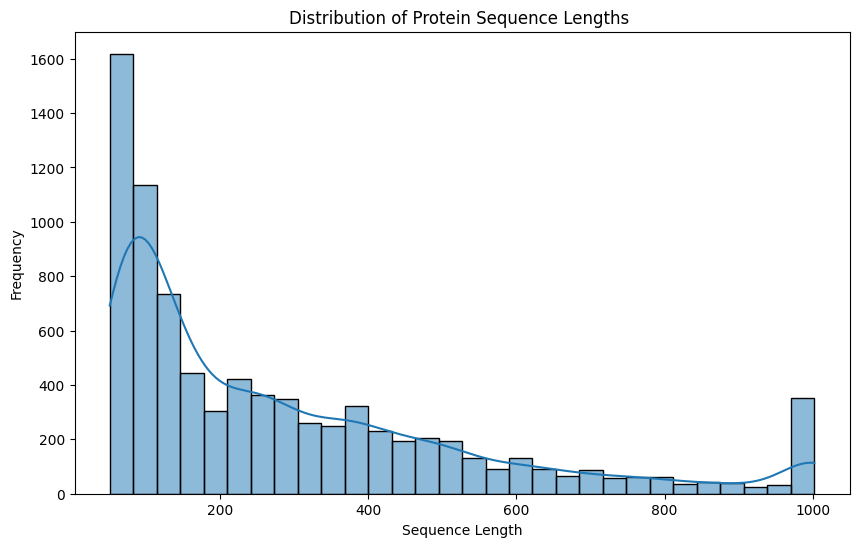

label
0    5015
1    3314
Name: count, dtype: int64
label
0    60.21131
1    39.78869
Name: count, dtype: float64


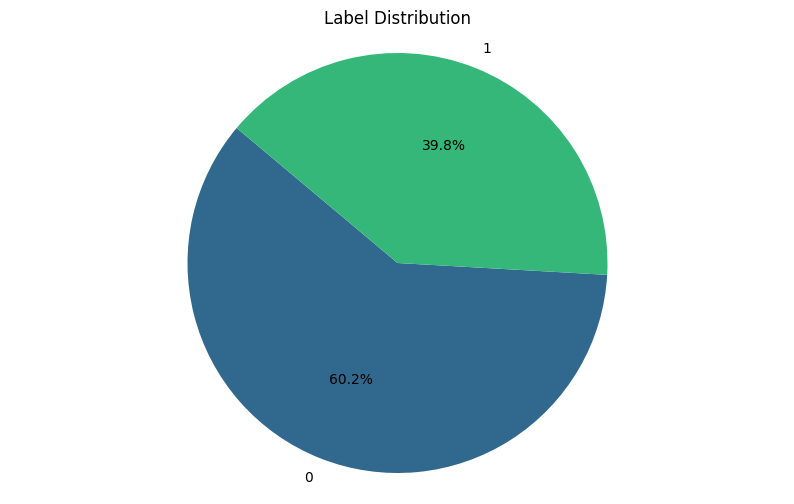

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(sequences_leq_Protin['sequence_length'], bins=30, kde=True)
plt.title('Distribution of Protein Sequence Lengths ')
plt.xlabel('Sequence Length')
plt.ylabel('Frequency')
plt.show()



# Calculate label distribution
label_distribution = sequences_leq_Protin['label'].value_counts()
print(label_distribution)
# Calculate the percentages of each label
label_percentages = (label_distribution / label_distribution.sum()) * 100
print(label_percentages)



# Plot the label distribution as a pie chart
plt.figure(figsize=(10, 6))
plt.pie(label_percentages, labels=label_percentages.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("viridis", len(label_percentages)))
plt.title('Label Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [13]:
# Save the filtered data to a CSV file
sequences_leq_Protin.to_csv('Protein1.csv', index=False)
print("Filtered data saved to 'Protein1.csv'")

Filtered data saved to 'Protein1.csv'


#    **Protein test** 



In [14]:
import pandas as pd

# Load the dataset
file_path = '//kaggle/input/new-datasettoxinsp/protein_test1002.csv'
data = pd.read_csv(file_path)

# Remove the unnamed index column
data = data.drop(columns=['Unnamed: 0'])

# Calculate sequence lengths
data['sequence_length'] = data['sequence'].apply(len)

# Calculate statistics for sequence lengths
length_stats = data['sequence_length'].describe()

# Label distribution
label_distribution = data['label'].value_counts()

# Output the calculated statistics
print("Statistics for Sequence Lengths:")
print(length_stats)
print("\nLabel Distribution:")
print(label_distribution)
data

Statistics for Sequence Lengths:
count     729.000000
mean      417.543210
std       282.454044
min        45.000000
25%       180.000000
50%       346.000000
75%       592.000000
max      1002.000000
Name: sequence_length, dtype: float64

Label Distribution:
label
0    670
1     59
Name: count, dtype: int64


,name,sequence,label,sequence_length
0,>OVO_DROME,MPKIFLIKNRLHQQQQRLLESQNLLQHKNQDDERLVPPLSPSGSGS...,0,1002
1,>S35B1_XENLA,MSSAPASGGLRLLVCFLGVFVCYFYYGILQETITRRTYGEGEKQEK...,0,320
2,>KTU_DROVI,MSASTRNKHSKIHGNEKLDITTDEFDRIRQALSNEEFRKLFFDYVD...,0,906
3,>SPIR_DROPS,MTEHHMDVQADATQSASESKAMAAPKGKFSEAEEGFLSTSPDSANG...,0,1002
4,>EFNMT_DROPS,MNLLPKTREEFAQTDYWNEFFKKRGEKAFEWYGEYLDLCDHIHKYI...,0,673
...,...,...,...,...
724,>EMC2B_XENLA,MSKVSDLYDVTWEDMRDKMKTWREDNYRNSEQIVDVGEELINEHAS...,0,297
725,>COLI_LITCT,MLQPVWHACILAILGVFIFHVGEVRSQCWESNKCTDLSSEDGILEC...,0,263
726,>MED30_DANRE,MTTPPLAQFSGQQQQQTQAARDVNTASLCRIGQETVQDIVLRTMEI...,0,174
727,>RB87F_DROME,MAEQNDSNGNYDDGEEITEPEQLRKLFIGGLDYRTTDDGLKAHFEK...,0,385


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


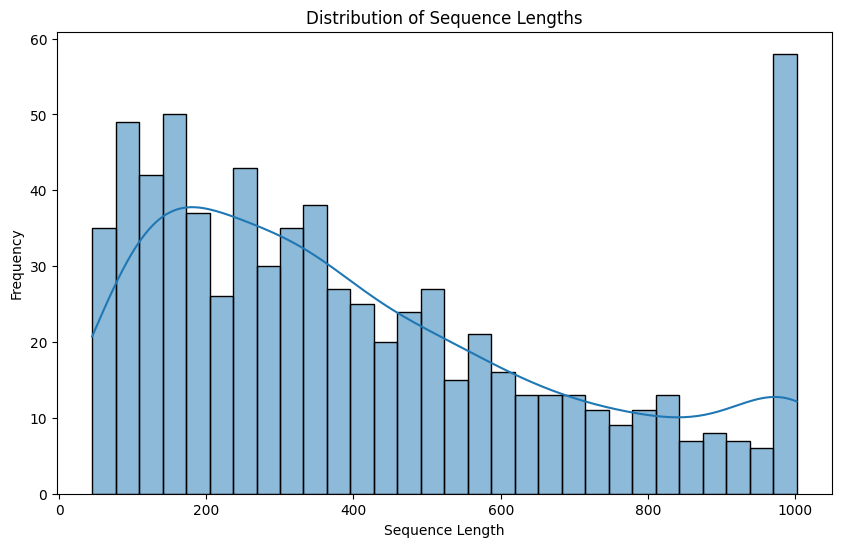

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter the data for sequence lengths between 0 and 50
#filtered_data = data[(data['sequence_length'] >= 0) & (data['sequence_length'] <= 50)]

# Plot histogram of sequence lengths in the range 0-50
plt.figure(figsize=(10, 6))
sns.histplot(data['sequence_length'], bins=30, kde=True)
plt.title('Distribution of Sequence Lengths')
plt.xlabel('Sequence Length')
plt.ylabel('Frequency')
plt.show()


In [16]:
# Find the total number of sequences with lengths between 0 and 50
total_sequences = len(data)
# Print the total number of sequences
print(f"Total number of sequences with lengths : {total_sequences}")

Total number of sequences with lengths : 729


label
0    670
1     59
Name: count, dtype: int64
label
0    91.906722
1     8.093278
Name: count, dtype: float64


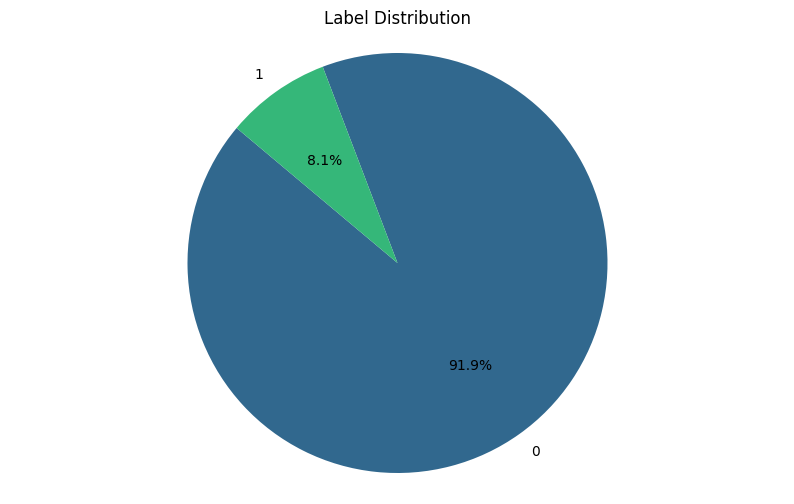

In [17]:
import matplotlib.pyplot as plt

# Calculate label distribution
label_distribution = data['label'].value_counts()
print(label_distribution)
# Calculate the percentages of each label
label_percentages = (label_distribution / label_distribution.sum()) * 100
print(label_percentages)
# Plot the label distribution as a pie chart
plt.figure(figsize=(10, 6))
plt.pie(label_percentages, labels=label_percentages.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("viridis", len(label_percentages)))
plt.title('Label Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

# Extracted Peptides from protein_test

In [18]:
# Find sequences with length <= 50
sequences_leq_50 = data[data['sequence_length'] <= 50]
print(f"Number of Peptide sequences with length <= 50: {len(sequences_leq_50)}")
sequences_leq_50

Number of Peptide sequences with length <= 50: 2


,name,sequence,label,sequence_length
174,>SCK_HOTTA,CQNECCGISSLRERNYCANLVCINCFCQGRTYKICRCFFSIHAIR,1,45
221,>TXP9_PLETR,CAKHSETCKNGNCCTCTQYRGKDEPMACRRGTHGQRCQCVMKIMKH,1,46


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


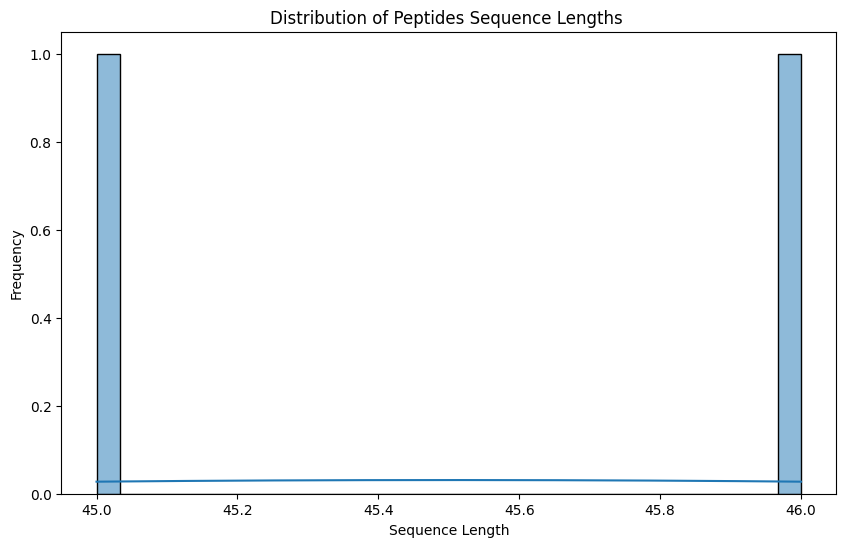

label
1    2
Name: count, dtype: int64
label
1    100.0
Name: count, dtype: float64


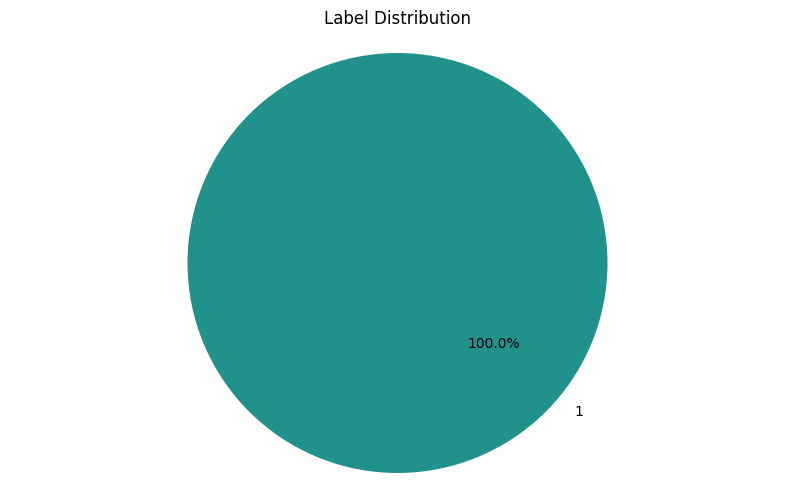

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(sequences_leq_50['sequence_length'], bins=30, kde=True)
plt.title('Distribution of Peptides Sequence Lengths ')
plt.xlabel('Sequence Length')
plt.ylabel('Frequency')
plt.show()



# Calculate label distribution
label_distribution = sequences_leq_50['label'].value_counts()
print(label_distribution)
# Calculate the percentages of each label
label_percentages = (label_distribution / label_distribution.sum()) * 100
print(label_percentages)



# Plot the label distribution as a pie chart
plt.figure(figsize=(10, 6))
plt.pie(label_percentages, labels=label_percentages.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("viridis", len(label_percentages)))
plt.title('Label Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [20]:
# Save the filtered data to a CSV file
sequences_leq_50.to_csv('Peptide2.csv', index=False)
print("Filtered data saved to 'Peptide2.csv'")

Filtered data saved to 'Peptide2.csv'


# Extracted only Proteins from Protein Test

In [21]:
# Find sequences with length > 50
sequences_leq_Protin = data[data['sequence_length'] > 50]
print(f"Number of Protien sequences with length > 50: {len(sequences_leq_Protin)}")
sequences_leq_Protin

Number of Protien sequences with length > 50: 727


,name,sequence,label,sequence_length
0,>OVO_DROME,MPKIFLIKNRLHQQQQRLLESQNLLQHKNQDDERLVPPLSPSGSGS...,0,1002
1,>S35B1_XENLA,MSSAPASGGLRLLVCFLGVFVCYFYYGILQETITRRTYGEGEKQEK...,0,320
2,>KTU_DROVI,MSASTRNKHSKIHGNEKLDITTDEFDRIRQALSNEEFRKLFFDYVD...,0,906
3,>SPIR_DROPS,MTEHHMDVQADATQSASESKAMAAPKGKFSEAEEGFLSTSPDSANG...,0,1002
4,>EFNMT_DROPS,MNLLPKTREEFAQTDYWNEFFKKRGEKAFEWYGEYLDLCDHIHKYI...,0,673
...,...,...,...,...
724,>EMC2B_XENLA,MSKVSDLYDVTWEDMRDKMKTWREDNYRNSEQIVDVGEELINEHAS...,0,297
725,>COLI_LITCT,MLQPVWHACILAILGVFIFHVGEVRSQCWESNKCTDLSSEDGILEC...,0,263
726,>MED30_DANRE,MTTPPLAQFSGQQQQQTQAARDVNTASLCRIGQETVQDIVLRTMEI...,0,174
727,>RB87F_DROME,MAEQNDSNGNYDDGEEITEPEQLRKLFIGGLDYRTTDDGLKAHFEK...,0,385


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


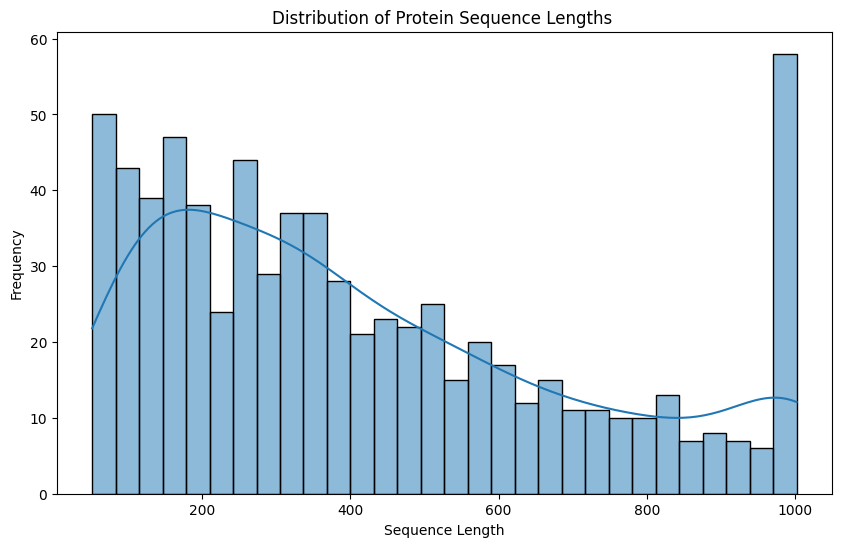

label
0    670
1     57
Name: count, dtype: int64
label
0    92.15956
1     7.84044
Name: count, dtype: float64


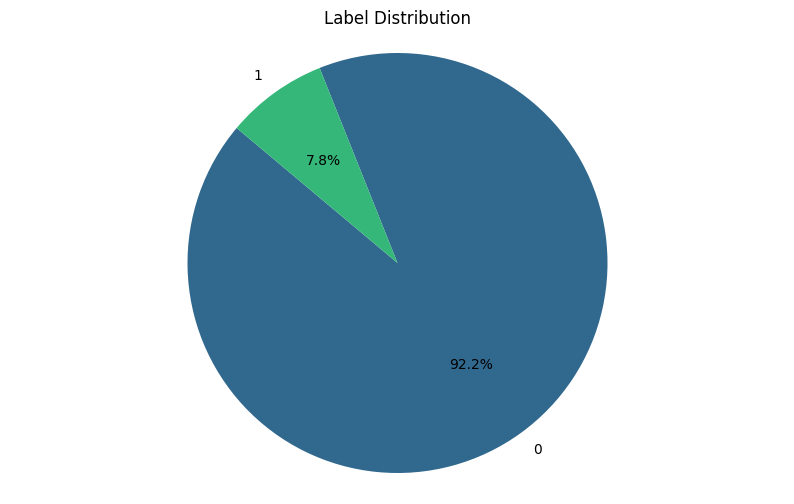

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(sequences_leq_Protin['sequence_length'], bins=30, kde=True)
plt.title('Distribution of Protein Sequence Lengths ')
plt.xlabel('Sequence Length')
plt.ylabel('Frequency')
plt.show()



# Calculate label distribution
label_distribution = sequences_leq_Protin['label'].value_counts()
print(label_distribution)
# Calculate the percentages of each label
label_percentages = (label_distribution / label_distribution.sum()) * 100
print(label_percentages)



# Plot the label distribution as a pie chart
plt.figure(figsize=(10, 6))
plt.pie(label_percentages, labels=label_percentages.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("viridis", len(label_percentages)))
plt.title('Label Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [23]:
# Save the filtered data to a CSV file
sequences_leq_Protin.to_csv('Protein2.csv', index=False)
print("Filtered data saved to 'Protein2.csv'")

Filtered data saved to 'Protein2.csv'


#  **Peptide.csv**

In [24]:
import pandas as pd

# Load the dataset
file_path = '/kaggle/input/new-datasettoxinsp/peptide.csv'
data = pd.read_csv(file_path)

# Remove the unnamed index column
data = data.drop(columns=['Unnamed: 0'])

# Calculate sequence lengths
data['sequence_length'] = data['sequence'].apply(len)

# Calculate statistics for sequence lengths
length_stats = data['sequence_length'].describe()

# Label distribution
label_distribution = data['label'].value_counts()

# Output the calculated statistics
print("Statistics for Sequence Lengths:")
print(length_stats)
print("\nLabel Distribution:")
print(label_distribution)
data

Statistics for Sequence Lengths:
count    3864.000000
mean       33.721273
std         9.359377
min        13.000000
25%        27.000000
50%        34.000000
75%        41.000000
max        50.000000
Name: sequence_length, dtype: float64

Label Distribution:
label
1    1932
0    1932
Name: count, dtype: int64


,sequence,label,sequence_length
0,ACSGRGSRCPPQCCMGLTCGREYPPRC,1,27
1,CGPCFTKDPETEKKCATCCGGIGRCFGPQCLCNRGY,1,36
2,MSDINATRLPHLVRYPPYVGDGTDLTLNRGEK,1,32
3,QKELVVTATTTCCGYNPMTSCPRCMCDSSCNKKKP,1,35
4,CCPFPMCYQVPHCPCC,1,16
...,...,...,...
3859,EDDHHHHHHHHHGVGGGGGGGGGG,0,24
3860,MTTNTQYIYPIFTVRWLAVHALAVPTVFFLGSISAMQFIQR,0,41
3861,GILDVAKTLVGKLRNVLGI,0,19
3862,MKVLSSLASAKTRYPDCQVVRRRGRVYVICKSNPRFKAVQGRKKRR,0,46


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


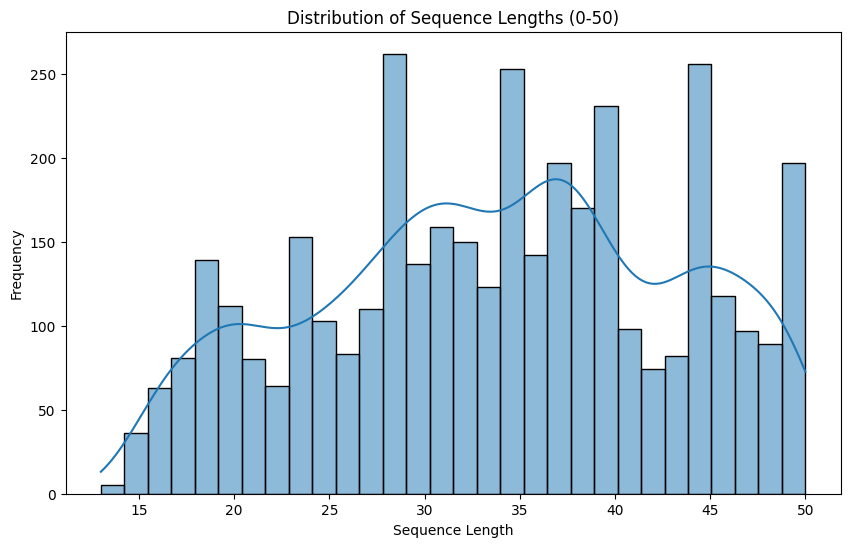

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter the data for sequence lengths between 0 and 50
#filtered_data = data[(data['sequence_length'] >= 0) & (data['sequence_length'] <= 50)]

# Plot histogram of sequence lengths in the range 0-50
plt.figure(figsize=(10, 6))
sns.histplot(data['sequence_length'], bins=30, kde=True)
plt.title('Distribution of Sequence Lengths (0-50)')
plt.xlabel('Sequence Length')
plt.ylabel('Frequency')
plt.show()


In [26]:
total_sequences = len(data)
# Print the total number of sequences
print(f"Total number of sequences with lengths: {total_sequences}")

Total number of sequences with lengths: 3864


label
1    1932
0    1932
Name: count, dtype: int64
label
1    50.0
0    50.0
Name: count, dtype: float64


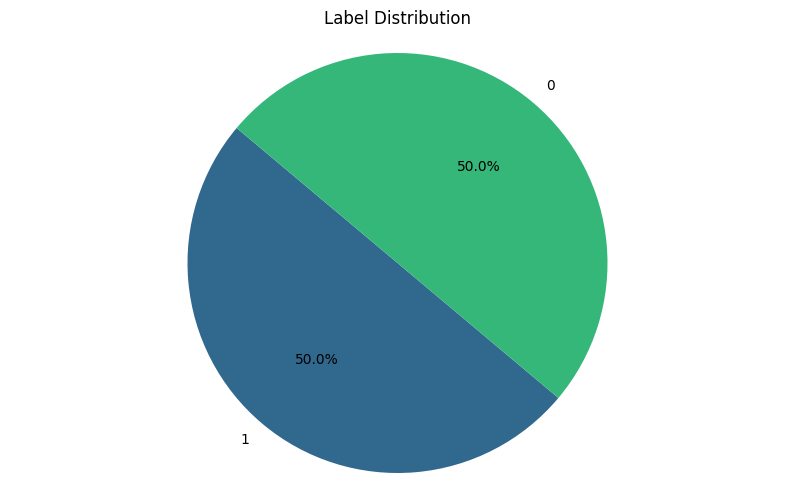

In [27]:
import matplotlib.pyplot as plt

# Calculate label distribution
label_distribution = data['label'].value_counts()
print(label_distribution)
# Calculate the percentages of each label
label_percentages = (label_distribution / label_distribution.sum()) * 100
print(label_percentages)

# Plot the label distribution as a pie chart
plt.figure(figsize=(10, 6))
plt.pie(label_percentages, labels=label_percentages.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("viridis", len(label_percentages)))
plt.title('Label Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [28]:
# Save the filtered data to a CSV file
data.to_csv('Peptide3.csv', index=False)

print("Filtered data saved to 'Peptide3.csv'")

Filtered data saved to 'Peptide3.csv'


# Will combine the full data and will be doing the train,split then after analysis

Peptide Combination


In [29]:
import pandas as pd

# File paths
file_paths = [
    '/kaggle/working/Peptide1.csv',
    '/kaggle/working/Peptide2.csv',
    '/kaggle/working/Peptide3.csv'
]

# List to hold individual DataFrames
dfs = []

# Load each CSV file into a DataFrame
for file_path in file_paths:
    df = pd.read_csv(file_path)
    dfs.append(df)

# Concatenate the DataFrames vertically
combined_df = pd.concat(dfs, ignore_index=True)

combined_df.to_csv('/kaggle/working/combined_peptides.csv', index=False)
print("Combined DataFrame saved to 'combined_peptides.csv'")

Combined DataFrame saved to 'combined_peptides.csv'


Protein Combination

In [30]:
import pandas as pd

# File paths
file_paths = [
    '/kaggle/working/Protein1.csv',
    '/kaggle/working/Protein2.csv',
]

# List to hold individual DataFrames
dfs = []

# Load each CSV file into a DataFrame
for file_path in file_paths:
    df = pd.read_csv(file_path)
    dfs.append(df)

# Concatenate the DataFrames vertically
combined_df = pd.concat(dfs, ignore_index=True)

combined_df.to_csv('/kaggle/working/combined_protein.csv', index=False)
print("Combined DataFrame saved to 'combined_protein.csv'")


Combined DataFrame saved to 'combined_protein.csv'


# Analysis Peptide

In [44]:
import pandas as pd

# Load the dataset
file_path = '/kaggle/working/combined_peptides.csv'
data = pd.read_csv(file_path)


total_sequences = len(data)
# Print the total number of sequences
print(f"Total number of Peptide sequences with lengths : {total_sequences}")
data

Total number of Peptide sequences with lengths : 5621


,name,sequence,label,sequence_length
0,>COC2C_CONCL,DVCDSLVGGRCIHNGCYCERDAPNGNCCNTDGCTARWWCPGTKWD,1,45
1,>NA15_ANTXA,GVSCLCDSDGPSVSGNTLSGIIWLAGCPSGWHNCKAHGPNIGWCCKK,1,47
2,>PPK6_SHELA,SESEVPGMWFGPRL,0,14
3,>SK1_BLAGE,EQFDDYGHMRF,0,11
4,>COMB_CONMA,AATCTHWALIYFKTVQLFGWHFNYQVDATYCPQFQPCMP,1,39
...,...,...,...,...
5616,NaN,EDDHHHHHHHHHGVGGGGGGGGGG,0,24
5617,NaN,MTTNTQYIYPIFTVRWLAVHALAVPTVFFLGSISAMQFIQR,0,41
5618,NaN,GILDVAKTLVGKLRNVLGI,0,19
5619,NaN,MKVLSSLASAKTRYPDCQVVRRRGRVYVICKSNPRFKAVQGRKKRR,0,46


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


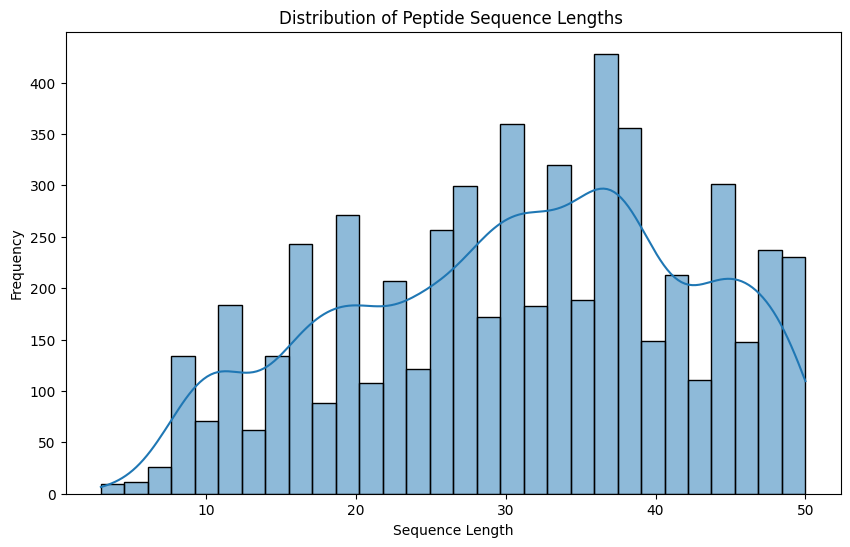

Statistics for Sequence Lengths:
count    5621.000000
mean       30.836862
std        11.319239
min         3.000000
25%        22.000000
50%        32.000000
75%        39.000000
max        50.000000
Name: sequence_length, dtype: float64

Label Distribution:
label
1    3033
0    2588
Name: count, dtype: int64
label
1    3033
0    2588
Name: count, dtype: int64
label
1    53.95837
0    46.04163
Name: count, dtype: float64


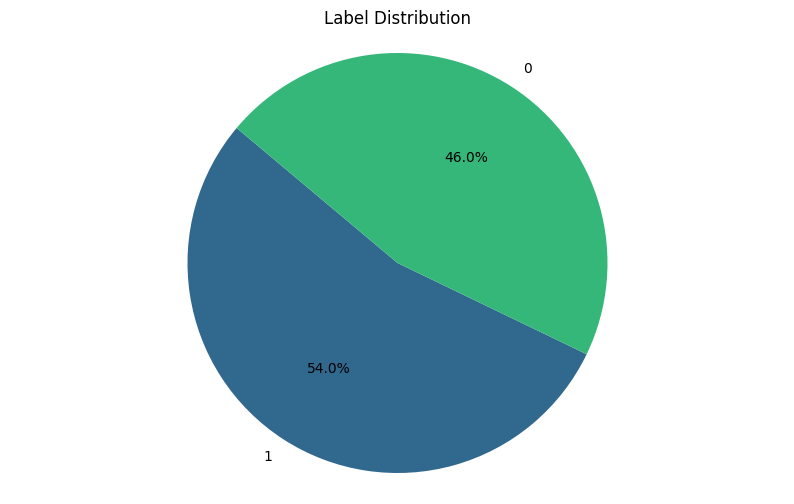

In [45]:
# Calculate sequence lengths
data['sequence_length'] = data['sequence'].apply(len)
# Calculate statistics for sequence lengths
length_stats = data['sequence_length'].describe()


plt.figure(figsize=(10, 6))
sns.histplot(data['sequence_length'], bins=30, kde=True)
plt.title('Distribution of Peptide Sequence Lengths ')
plt.xlabel('Sequence Length')
plt.ylabel('Frequency')
plt.show()


# Label distribution
label_distribution = data['label'].value_counts()
# Output the calculated statistics
print("Statistics for Sequence Lengths:")
print(length_stats)
print("\nLabel Distribution:")
print(label_distribution)



import matplotlib.pyplot as plt

# Calculate label distribution
label_distribution = data['label'].value_counts()
print(label_distribution)
# Calculate the percentages of each label
label_percentages = (label_distribution / label_distribution.sum()) * 100
print(label_percentages)
# Plot the label distribution as a pie chart
plt.figure(figsize=(10, 6))
plt.pie(label_percentages, labels=label_percentages.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("viridis", len(label_percentages)))
plt.title('Label Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

# Analysis Protein

In [46]:
import pandas as pd

# Load the dataset
file_path = '/kaggle/working/combined_protein.csv'
data = pd.read_csv(file_path)


total_sequences = len(data)
# Print the total number of sequences
print(f"Total number of Protein sequences with lengths : {total_sequences}")
data

Total number of Peptide sequences with lengths : 9056


,name,sequence,label,sequence_length
0,>HPCL1_XENTR,MGKQNSKLRPEVLQDLRENTEFTDHELQEWYKGFLKDCPTGHLTVE...,0,193
1,>SIX4_HOTTS,DGYIKGNKGCKVSCVINNVFCNSMCKSSGGSYGYCWSWGLACWCEG...,1,62
2,>TAG2L_AGEOR,MRAIISLLLISAMVFSIIEAVPEEEGLQLSEDERGGCLPHNRFCNA...,1,70
3,>P2011_DANRE,MKTKFTKKTVLKFFGILFAILLLSVLILFSVVIGRTFTFKVNRELG...,0,515
4,>O165_CONTE,MKLTCMVIVAVLFLTAWTFVTAITSNGLENLFPNAHHEMKNPEASK...,1,76
...,...,...,...,...
9051,>EMC2B_XENLA,MSKVSDLYDVTWEDMRDKMKTWREDNYRNSEQIVDVGEELINEHAS...,0,297
9052,>COLI_LITCT,MLQPVWHACILAILGVFIFHVGEVRSQCWESNKCTDLSSEDGILEC...,0,263
9053,>MED30_DANRE,MTTPPLAQFSGQQQQQTQAARDVNTASLCRIGQETVQDIVLRTMEI...,0,174
9054,>RB87F_DROME,MAEQNDSNGNYDDGEEITEPEQLRKLFIGGLDYRTTDDGLKAHFEK...,0,385


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


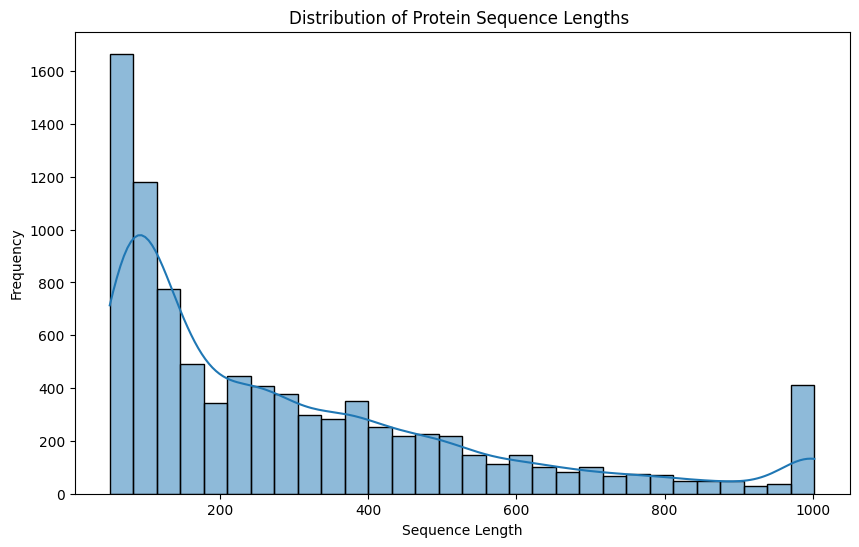

Statistics for Sequence Lengths:
count    9056.000000
mean      300.219633
std       256.773703
min        51.000000
25%        90.000000
50%       215.000000
75%       421.000000
max      1002.000000
Name: sequence_length, dtype: float64

Label Distribution:
label
0    5685
1    3371
Name: count, dtype: int64
label
0    5685
1    3371
Name: count, dtype: int64
label
0    62.77606
1    37.22394
Name: count, dtype: float64


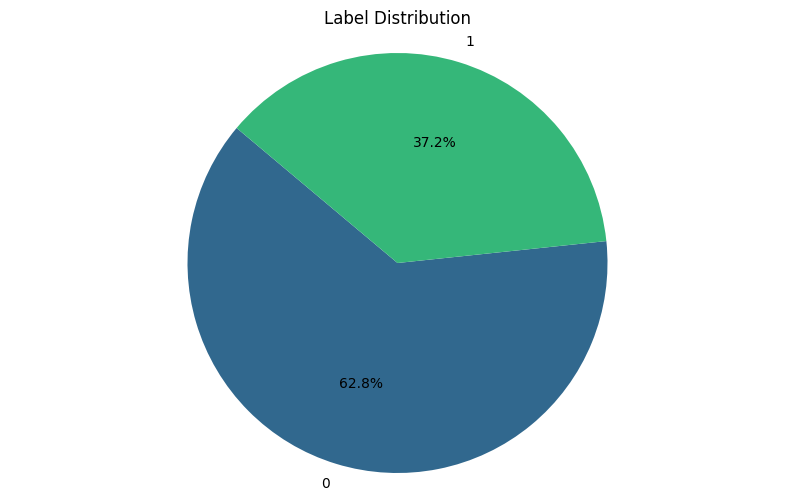

In [47]:
# Calculate sequence lengths
data['sequence_length'] = data['sequence'].apply(len)
# Calculate statistics for sequence lengths
length_stats = data['sequence_length'].describe()


plt.figure(figsize=(10, 6))
sns.histplot(data['sequence_length'], bins=30, kde=True)
plt.title('Distribution of Protein Sequence Lengths ')
plt.xlabel('Sequence Length')
plt.ylabel('Frequency')
plt.show()


# Label distribution
label_distribution = data['label'].value_counts()
# Output the calculated statistics
print("Statistics for Sequence Lengths:")
print(length_stats)
print("\nLabel Distribution:")
print(label_distribution)



import matplotlib.pyplot as plt

# Calculate label distribution
label_distribution = data['label'].value_counts()
print(label_distribution)
# Calculate the percentages of each label
label_percentages = (label_distribution / label_distribution.sum()) * 100
print(label_percentages)
# Plot the label distribution as a pie chart
plt.figure(figsize=(10, 6))
plt.pie(label_percentages, labels=label_percentages.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("viridis", len(label_percentages)))
plt.title('Label Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()